In [414]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()        

In [415]:
print(breast_cancer.DESCR)  #for show datasets

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset Info

In [416]:
breast_cancer.target[500] #check sample - 0 = - and 1 = +

np.int64(1)

In [417]:
breast_cancer.target.shape #show  Instances

(569,)

In [418]:
breast_cancer.data[500]  #show data people

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [419]:
breast_cancer.data.shape # Instances & Feature 

(569, 30)

# Preprocessing

In [420]:
from sklearn.model_selection import train_test_split
                                                  #Split dataset into 80% training and 20% testing sets
Feature_train,Feature_test,Label_train,Label_test = train_test_split(breast_cancer.data,breast_cancer.target,test_size=0.2)
print(f"Feature : train {Feature_train.shape} | test {Feature_test.shape}")
print(f"Label   : train {Label_train.shape}    | test {Label_test.shape}")

Feature : train (455, 30) | test (114, 30)
Label   : train (455,)    | test (114,)


In [421]:
Feature_train[0]

array([1.385e+01, 1.518e+01, 8.899e+01, 5.874e+02, 9.516e-02, 7.688e-02,
       4.479e-02, 3.711e-02, 2.110e-01, 5.853e-02, 2.479e-01, 9.195e-01,
       1.830e+00, 1.941e+01, 4.235e-03, 1.541e-02, 1.457e-02, 1.043e-02,
       1.528e-02, 1.593e-03, 1.498e+01, 2.174e+01, 9.837e+01, 6.700e+02,
       1.185e-01, 1.724e-01, 1.456e-01, 9.993e-02, 2.955e-01, 6.912e-02])

In [422]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Normalizes data to [0, 1] range
Feature_train = scaler.fit_transform(Feature_train)
Feature_test = scaler.transform(Feature_test)

In [423]:
Feature_train[0]
# Normalizes data OK!

array([0.32509821, 0.22697095, 0.31234884, 0.18829268, 0.38394872,
       0.17636955, 0.10494377, 0.18444334, 0.50347037, 0.18715877,
       0.04939345, 0.17016551, 0.05055836, 0.02354884, 0.07588443,
       0.13733717, 0.03679293, 0.1975753 , 0.08271023, 0.02225007,
       0.25080043, 0.25906183, 0.23885652, 0.11915061, 0.26353024,
       0.1348859 , 0.11629393, 0.34340206, 0.31677169, 0.09133889])

# Classification    


In [424]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test):
    """
    Calculate and print evaluation metrics for classification model
    
    Args:
        Label_train: Actual labels of training set
        Label_test: Actual labels of test set
        Label_pred_train: Predicted labels for training set
        Label_pred_test: Predicted labels for test set
    
    Returns:
        Tuple of (train_accuracy, test_accuracy, precision, recall)
    """
    
    # Calculate accuracy for both train and test sets
    acc_train = accuracy_score(y_true=Label_train, y_pred=Label_pred_train)  # (TP + TN) / Total
    acc_test = accuracy_score(y_true=Label_test, y_pred=Label_pred_test)    # (TP + TN) / Total
    
    # Calculate precision and recall for test set only
    precision = precision_score(y_true=Label_test, y_pred=Label_pred_test)  # TP / (TP + FP)
    recall = recall_score(y_true=Label_test, y_pred=Label_pred_test)        # TP / (TP + FN)
    
    # Print formatted results
    print(f"Train Accuracy: {acc_train:.6f}  , Test Accuracy: {acc_test:.6f}\n"
          f"Precision:      {precision:.6f}  , Recall:        {recall:.6f}")
    
    return acc_train, acc_test, precision, recall

## 1. naive bayes

In [425]:
from sklearn.naive_bayes import GaussianNB
import time
start_time_gnb = time.time()
gnb = GaussianNB()
gnb.fit(Feature_train , Label_train)
end_time_gnb = time.time()
time_gnb = end_time_gnb - start_time_gnb
print(f" {time_gnb:.5f} seconds")

 0.00122 seconds


In [426]:
# Make predictions using trained GaussianNB model
Label_pred_train = gnb.predict(Feature_train)
Label_pred_test = gnb.predict(Feature_test)

# Evaluate model performance metrics
acc_train_gnb, acc_test_gnb, precision_gnb, recall_gnb = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.945055  , Test Accuracy: 0.947368
Precision:      0.931507  , Recall:        0.985507


## 2. KNN

In [427]:
from sklearn.neighbors import KNeighborsClassifier

start_time_knn = time.time()

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree',leaf_size=28)
knn.fit(Feature_train , Label_train)

end_time_knn = time.time()
time_knn = end_time_knn - start_time_knn
print(f" {time_knn:.5f} seconds")


 0.00176 seconds


In [428]:
# Make predictions using trained KNN model
Label_pred_train = knn.predict(Feature_train)
Label_pred_test = knn.predict(Feature_test)

# Evaluate model performance metrics
acc_train_knn, acc_test_knn, precision_knn, recall_knn = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.982418  , Test Accuracy: 0.947368
Precision:      0.943662  , Recall:        0.971014


## 3. decision tree

In [429]:
from sklearn.tree import DecisionTreeClassifier

start_time_dt = time.time()

dt = DecisionTreeClassifier(max_depth=256 , min_samples_split=4 , criterion='entropy')
dt.fit(Feature_train , Label_train)

end_time_dt = time.time()
time_dt = end_time_dt - start_time_dt
print(f" {time_dt:.5f} seconds")


 0.00626 seconds


In [430]:
# Make predictions using trained decision tree model
Label_pred_train = dt.predict(Feature_train)
Label_pred_test = dt.predict(Feature_test)

# Evaluate model performance metrics
acc_train_dt, acc_test_dt, precision_dt, recall_dt = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.997802  , Test Accuracy: 0.921053
Precision:      0.905405  , Recall:        0.971014


## 4.random forest

In [431]:
from sklearn.ensemble import RandomForestClassifier

start_time_rf = time.time()

rf = RandomForestClassifier(n_estimators=1000 , max_depth=512 , min_samples_split=4)
rf.fit(Feature_train , Label_train)

end_time_rf = time.time()
time_rf = end_time_rf - start_time_rf
print(f" {time_rf:.5f} seconds")

 1.19143 seconds


In [432]:
# Generate predictions using trained Random Forest model
Label_pred_train = rf.predict(Feature_train)
Label_pred_test = rf.predict(Feature_test)

acc_train_rf, acc_test_rf, precision_rf, recall_rf = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 1.000000  , Test Accuracy: 0.947368
Precision:      0.931507  , Recall:        0.985507


## 5.SVM

In [433]:
from sklearn.svm import SVC

start_time_svm = time.time()

svm = SVC()
svm.fit(Feature_train , Label_train)


end_time_svm = time.time()
time_svm = end_time_svm - start_time_svm
print(f" {time_svm:.5f} seconds")


 0.00441 seconds


In [434]:
# Generate predictions using trained SVM model
Label_pred_train = svm.predict(Feature_train)
Label_pred_test = svm.predict(Feature_test)

acc_train_svm, acc_test_svm, precision_svm, recall_svm = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.989011  , Test Accuracy: 0.947368
Precision:      0.931507  , Recall:        0.985507


## 6. Logistic regression

In [435]:
from sklearn.linear_model import LogisticRegression

start_time_lr = time.time()

lr = LogisticRegression()
lr.fit(Feature_train , Label_train)

end_time_lr = time.time()
time_lr = end_time_lr - start_time_lr
print(f" {time_lr:.5f} seconds")

 0.00416 seconds


In [436]:
# Generate predictions using trained Logistic Regression model
Label_pred_train = lr.predict(Feature_train)
Label_pred_test = lr.predict(Feature_test)

acc_train_lr, acc_test_lr, precision_lr, recall_lr = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.982418  , Test Accuracy: 0.956140
Precision:      0.932432  , Recall:        1.000000


## 7.ANN

In [437]:
from sklearn.neural_network import MLPClassifier

start_time_ANN = time.time()

ann = MLPClassifier(hidden_layer_sizes=256,activation='relu',solver='adam',batch_size=64)
ann.fit(Feature_train , Label_train)

end_time_ANN = time.time()
time_ANN = end_time_ANN - start_time_ANN
print(f" {time_ANN:.5f} seconds")

 0.43301 seconds


d:\GIT\MachineLearningProject\Breast Cancer Detection\venvML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [438]:
# Generate predictions using trained ANN model
Label_pred_train = ann.predict(Feature_train)
Label_pred_test = ann.predict(Feature_test)

acc_train_ann, acc_test_ann, precision_ann, recall_ann = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.995604  , Test Accuracy: 0.938596
Precision:      0.907895  , Recall:        1.000000


# Compration

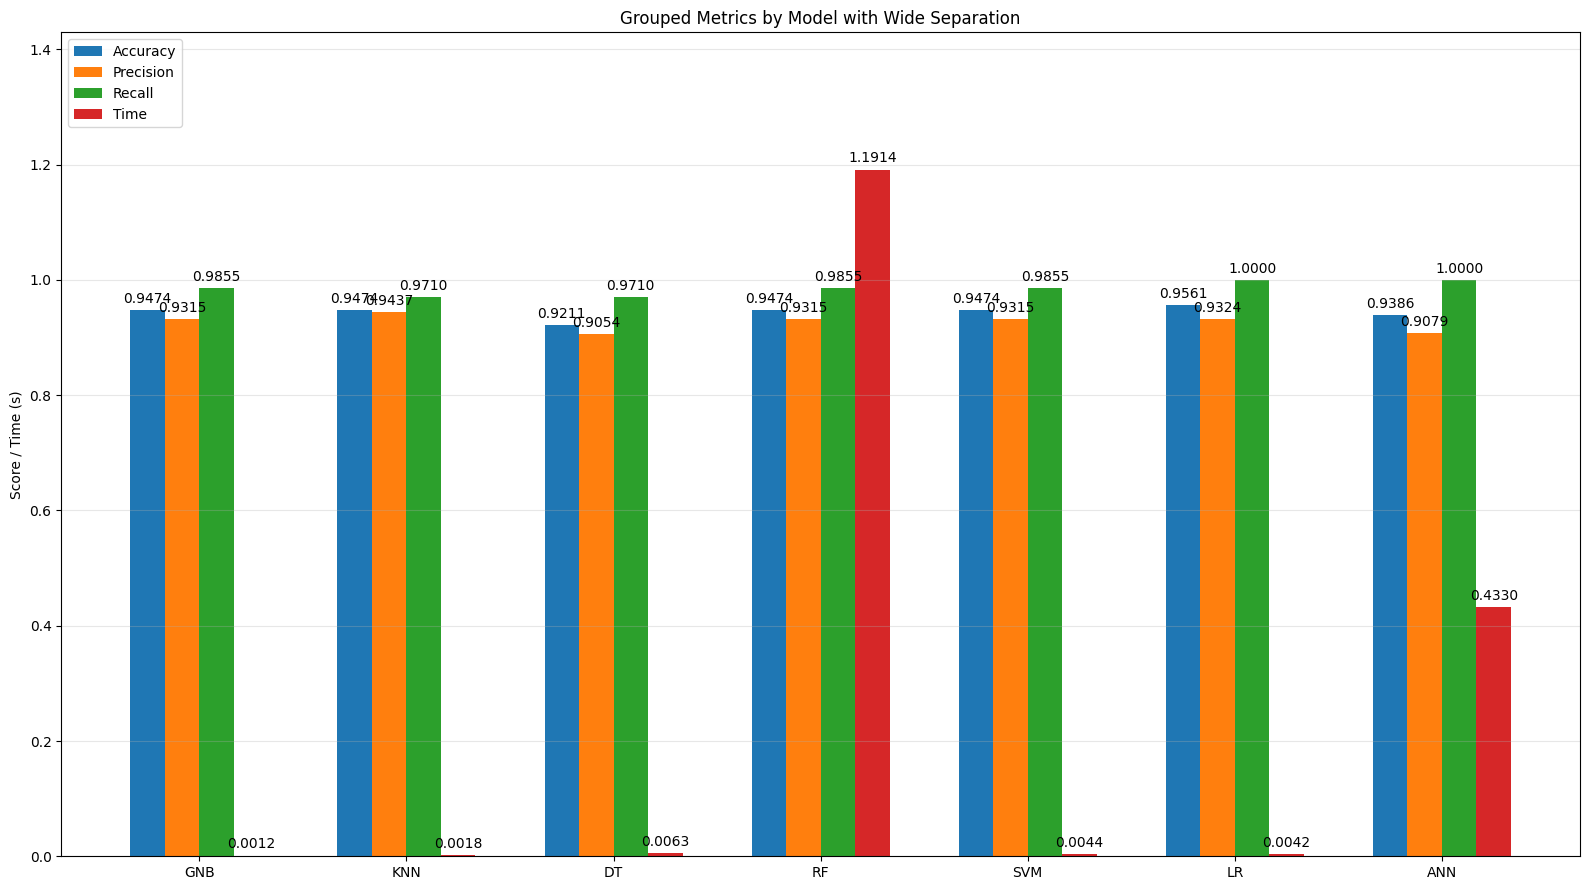

In [450]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics
metrics = {
    'Accuracy': [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann],
    'Precision': [precision_gnb, precision_knn, precision_dt, precision_rf, precision_svm, precision_lr, precision_ann],
    'Recall': [recall_gnb, recall_knn, recall_dt, recall_rf, recall_svm, recall_lr, recall_ann],
    'Time': [time_gnb, time_knn, time_dt, time_rf, time_svm, time_lr, time_ANN],
}

# Model labels
models = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
num_models = len(models)
num_metrics = len(metrics)

# Settings
group_width = 1         # Total width occupied by all bars in one group
bar_width = group_width / num_metrics
group_spacing = 1.5       # Space between groups (models)

# X locations for each model group
x_base = np.arange(num_models) * group_spacing

# Setup figure
fig, ax = plt.subplots(figsize=(16, 9))

# Plot each metric with offset
for i, (metric_name, values) in enumerate(metrics.items()):
    offsets = x_base + (i - num_metrics / 2) * bar_width + bar_width / 2
    rects = ax.bar(offsets, values, width=bar_width, label=metric_name)
    ax.bar_label(rects, padding=3, fmt='%.4f')

# Axis settings
ax.set_xticks(x_base)
ax.set_xticklabels(models)
ax.set_ylabel('Score / Time (s)')
ax.set_title('Grouped Metrics by Model with Wide Separation')
ax.legend(loc='upper left')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, max([max(v) for v in metrics.values()]) * 1.2)

plt.tight_layout()
plt.show()
